# Importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('datasets/74089.csv')
df.head()

,Unnamed: 0,MA_TINH,MA_BV,KHAM_BENH,NGAY_DULIEU
0,6,74,74089,5.0,2019-01-01
1,79,74,74089,558.0,2019-01-02
2,173,74,74089,455.0,2019-01-03
3,267,74,74089,418.0,2019-01-04
4,345,74,74089,198.0,2019-01-05


In [3]:
df.tail()

,Unnamed: 0,MA_TINH,MA_BV,KHAM_BENH,NGAY_DULIEU
359,23671,74,74089,338.0,2019-12-27
360,23706,74,74089,103.0,2019-12-28
361,23715,74,74089,NaN,2019-12-29
362,23777,74,74089,391.0,2019-12-30
363,23851,74,74089,305.0,2019-12-31


In [4]:
df.shape

(364, 5)

In [5]:
df.rename(columns={"MA_TINH": "city_code", "MA_BV": "hospital_code", "KHAM_BENH": "volume", "NGAY_DULIEU": "date"}, errors="raise", inplace=True)
df.head()

,Unnamed: 0,city_code,hospital_code,volume,date
0,6,74,74089,5.0,2019-01-01
1,79,74,74089,558.0,2019-01-02
2,173,74,74089,455.0,2019-01-03
3,267,74,74089,418.0,2019-01-04
4,345,74,74089,198.0,2019-01-05


In [6]:
df.describe()

,Unnamed: 0,city_code,hospital_code,volume
count,364.000000,364.0,364.0,308.000000
mean,11949.815934,74.0,74089.0,340.412338
std,6893.647803,0.0,0.0,151.308286
min,6.000000,74.0,74089.0,1.000000
25%,5892.500000,74.0,74089.0,282.500000
50%,12107.000000,74.0,74089.0,389.000000
75%,17699.750000,74.0,74089.0,439.000000
max,23851.000000,74.0,74089.0,615.000000


In [7]:
df.isna().sum()

Unnamed: 0        0
city_code         0
hospital_code     0
volume           56
date              0
dtype: int64

Missing Sundays' and holidays' values 

In [8]:
df['volume'].fillna(0, inplace=True)
df.isna().sum()

Unnamed: 0       0
city_code        0
hospital_code    0
volume           0
date             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     364 non-null    int64         
 1   city_code      364 non-null    int64         
 2   hospital_code  364 non-null    int64         
 3   volume         364 non-null    float64       
 4   date           364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 14.3 KB


In [11]:
df['day_of_the_week'] =  df['date'].dt.day_name()
# df['day_of_the_week'] = df['date'].astype('category')
df.head()

,Unnamed: 0,city_code,hospital_code,volume,date,day_of_the_week
0,6,74,74089,5.0,2019-01-01,Tuesday
1,79,74,74089,558.0,2019-01-02,Wednesday
2,173,74,74089,455.0,2019-01-03,Thursday
3,267,74,74089,418.0,2019-01-04,Friday
4,345,74,74089,198.0,2019-01-05,Saturday


In [12]:
# Initialize a list of holidays for the desired country (e.g., 'US' for United States)
vn_holidays = holidays.VN()

# Adding a new column to check if the date is a holiday
df['is_holiday'] = df['date'].apply(lambda x: x in vn_holidays)
df['holiday_name'] = df['date'].apply(lambda x: vn_holidays.get(x))
df

,Unnamed: 0,city_code,hospital_code,volume,date,day_of_the_week,is_holiday,holiday_name
0,6,74,74089,5.0,2019-01-01,Tuesday,True,International New Year's Day
1,79,74,74089,558.0,2019-01-02,Wednesday,False,None
2,173,74,74089,455.0,2019-01-03,Thursday,False,None
3,267,74,74089,418.0,2019-01-04,Friday,False,None
4,345,74,74089,198.0,2019-01-05,Saturday,False,None
...,...,...,...,...,...,...,...,...
359,23671,74,74089,338.0,2019-12-27,Friday,False,None
360,23706,74,74089,103.0,2019-12-28,Saturday,False,None
361,23715,74,74089,0.0,2019-12-29,Sunday,False,None
362,23777,74,74089,391.0,2019-12-30,Monday,False,None


In [13]:
final_df = df
final_df = final_df.drop(['holiday_name', 'Unnamed: 0', 'city_code', 'hospital_code'], axis=1)
final_df.fillna(0)
final_df.to_csv('final_data.csv', index=False)
final_df.head()

,volume,date,day_of_the_week,is_holiday
0,5.0,2019-01-01,Tuesday,True
1,558.0,2019-01-02,Wednesday,False
2,455.0,2019-01-03,Thursday,False
3,418.0,2019-01-04,Friday,False
4,198.0,2019-01-05,Saturday,False


# Exploring Data

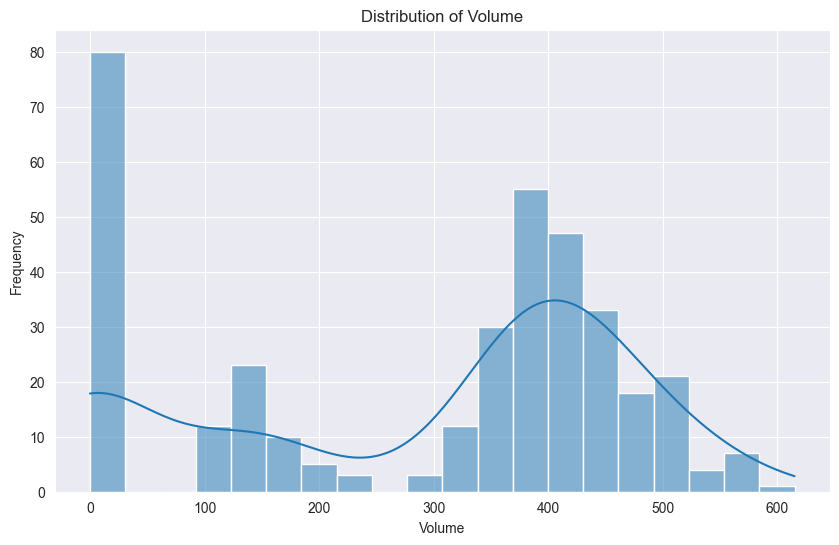

In [14]:
# Distribution of 'volume'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='volume', bins=20, kde=True)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

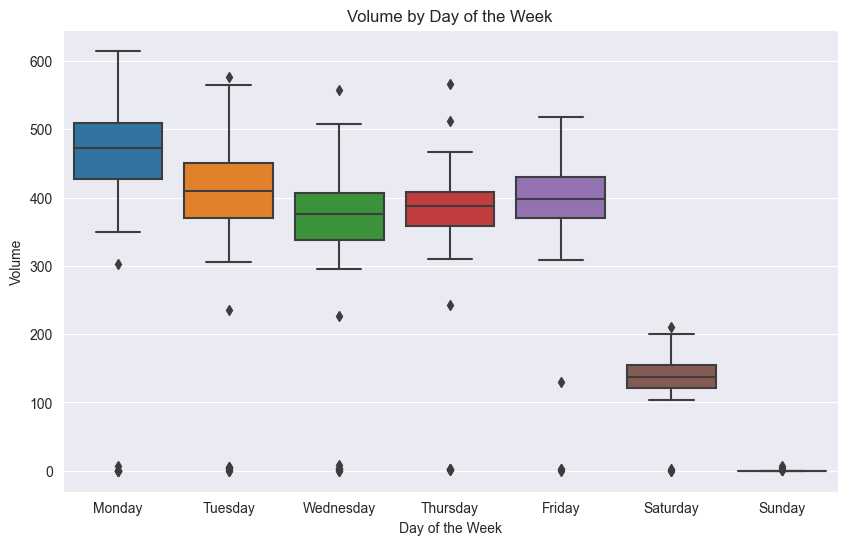

In [15]:
# Boxplot of 'volume' by 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_the_week', y='volume', 
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title('Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Volume')
# plt.xticks(rotation=45)
plt.show()

In [16]:
# # Visualize the volume by specific holidays
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df, y='holiday_name', x='volume')
# plt.title('Hospital Visit Volume by Holiday Name')
# plt.xlabel('Holiday Name')
# plt.ylabel('Volume')
# # plt.xticks(rotation=90)
# plt.show()

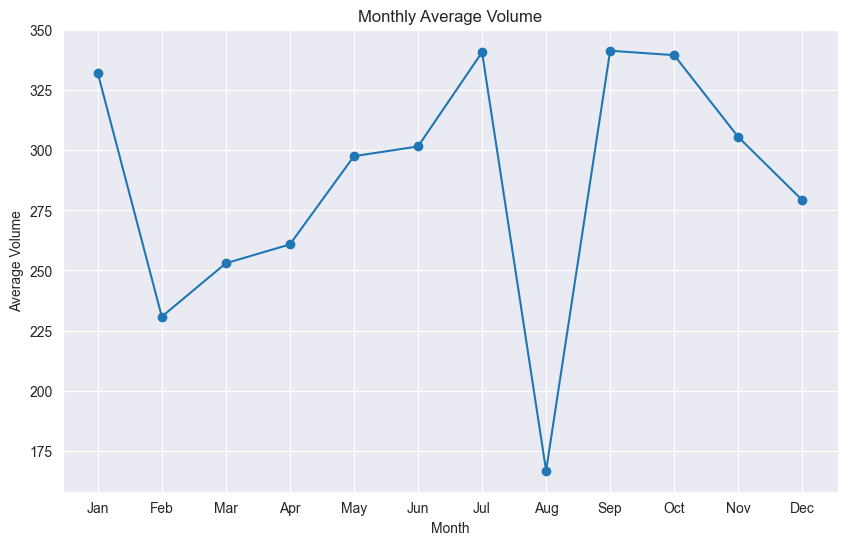

In [17]:
# Monthly Average Volume
hospital_df = df
hospital_df['date'] = pd.to_datetime(hospital_df['date'])
hospital_df['month'] = hospital_df['date'].dt.month
monthly_avg_volume = hospital_df.groupby('month')['volume'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_volume.index, monthly_avg_volume.values, marker='o')
plt.title('Monthly Average Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


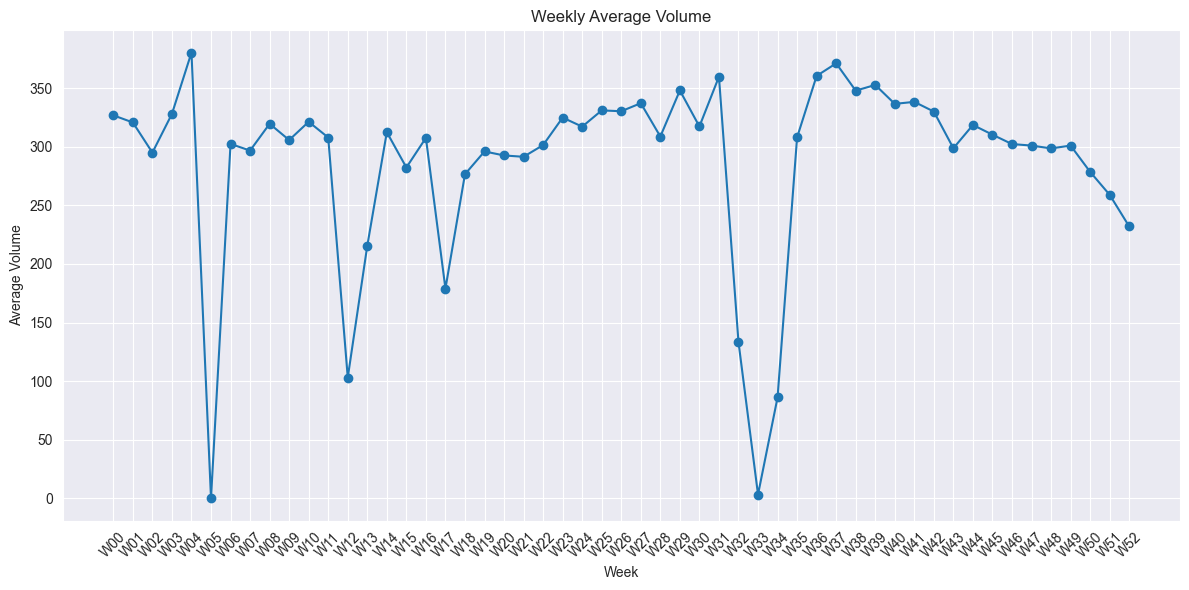

In [18]:
hospital_df['date'] = pd.to_datetime(hospital_df['date'])
hospital_df['week'] = hospital_df['date'].dt.strftime('W%U')
weekly_avg_volume = hospital_df.groupby('week')['volume'].mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_volume.index, weekly_avg_volume.values, marker='o')
plt.title('Weekly Average Volume')
plt.xlabel('Week')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


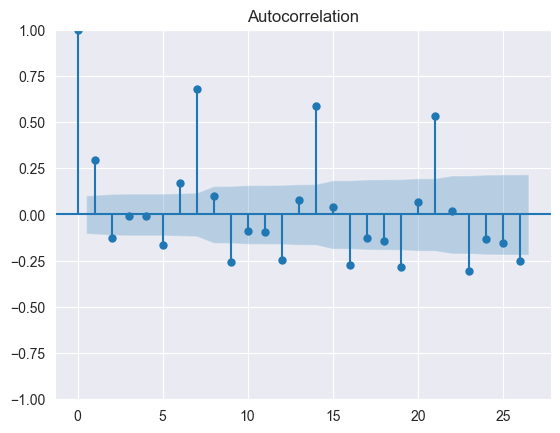

In [19]:
# Calculate the ACF (Auto Correlation Function)
plot_acf(df[['date', 'volume']].set_index('date'))
plt.show()


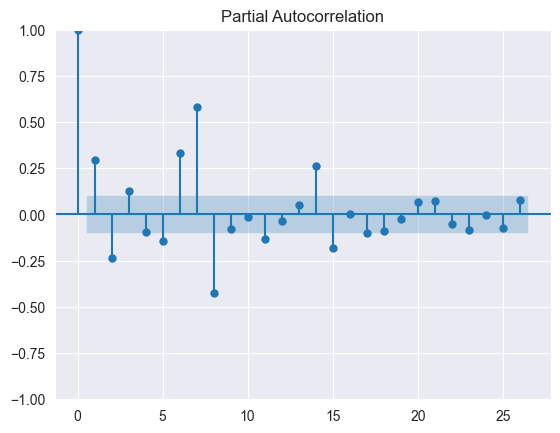

In [20]:
# Calculate the PACF (Partial Correlation Function)
plot_pacf(df[['date', 'volume']].set_index('date'))
plt.show()
